In [1]:
#  release an unreferenced memory 

import gc
gc.collect()

0

In [2]:
#Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium
import json
import datetime as dt
from sklearn.impute import SimpleImputer
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

In [3]:
#read in df

layoff_merge_new_clean1 =pd.read_csv(r'C:\Users\senoe\OneDrive\SEN Docs\Data Sci Job Applications\CareerFoundry\Datasets\Prepared data\layoff_merge_new_clean1.csv')

In [4]:
layoff_merge_new_clean1.head(5)

Unnamed: 0    state                     company  total_laid_off  \
0           0  Alabama  Corsicana Mattress Company              42   
1           1  Alabama                   EARTHLINK              42   
2           2  Alabama      JOHNSON CONTROLS, INC.              42   
3           3  Alabama                  FOOD WORLD              42   
4           4  Alabama                  FOOD WORLD              42   

      location industry        country   day  month    year  
0  SF Bay Area   Crypto  United States  26.0    7.0  2021.0  
1  SF Bay Area   Crypto  United States   4.0    2.0  2015.0  
2  SF Bay Area   Crypto  United States  13.0    5.0  2011.0  
3  SF Bay Area   Crypto  United States  16.0    3.0  2009.0  
4  SF Bay Area   Crypto  United States  16.0    3.0  2009.0

In [5]:
#drop unneccessary column(s)

layoff=layoff_merge_new_clean1.drop("Unnamed: 0", axis='columns')

In [6]:
#drop nan values from subset

layoff_merge_clean2 = layoff.dropna(how='any', subset=['day', 'month','year'])

In [7]:
layoff_merge_clean2.isnull().sum()

state             0
company           0
total_laid_off    0
location          0
industry          0
country           0
day               0
month             0
year              0
dtype: int64

In [8]:
#reshape the variables we need into numpy arrays and then put into separate objects

x=layoff_merge_clean2['year'].values.reshape(-1,1)
y=layoff_merge_clean2['total_laid_off'].values.reshape(-1,1)

In [9]:
x

array([[2021.],
       [2015.],
       [2011.],
       ...,
       [2014.],
       [2022.],
       [2020.]])

In [10]:
#Split data into train set and test set

x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.3, random_state=0)

In [11]:
#Create regression object

regression = LinearRegression() #This is the regression object we will fit into the training set 

In [12]:
#Fit the regression to the train set

regression.fit(x_train, y_train)

LinearRegression()

In [13]:
#Predict the value of y using x

y_predicted = regression.predict(x_test)

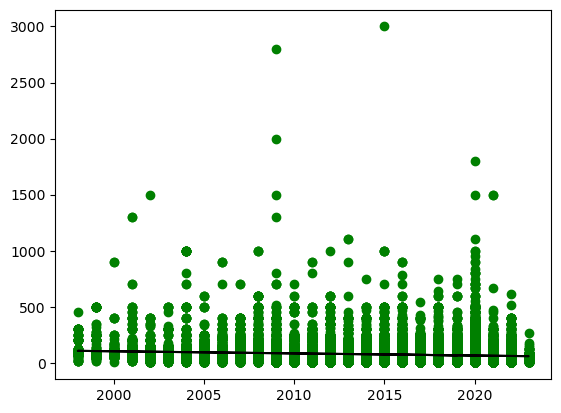

In [14]:
# Plotting regression line

plt.scatter(x_train, y_train,color='g') 

plt.plot(x_test, y_predicted,color='k') 

plt.show()

In [15]:
#Calculate the square root of MSE using math.sqrt() function to get the RMSE value

mse=mean_squared_error(y_test, y_predicted)

rmse = np.sqrt(mse)

In [16]:
#calculate the value of R square using sklearn library

r2=r2_score(x, y) 

In [17]:
print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[-1.90082991]]
Mean squared error:  71.30257020495618
R2 score:  -176213.8549445952


## Observations

A negative R2 is not a mathematical impossibility or the sign of a computer bug. It simply means that the chosen model (with its constraints) fits the data really poorly.

In [21]:
#Create a df to predict the real and predicted values of y

data= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0      100  66.892844
1       60  70.694503
2       40  64.992014
3      120  80.198653
4       20  68.793674
5       58  85.901143
6       22  66.892844
7      150  64.992014
8       65  64.992014
9       60  91.603632
10     223  64.992014
11      26  74.496163
12      40  63.091184
13      64  64.992014
14      70  70.694503
15      30  68.793674
16      70  61.190354
17     100  74.496163
18     300  72.595333
19      40  78.297823
20      20  84.000313
21      59  63.091184
22     223  64.992014
23      60  64.992014
24      50  66.892844
25      30  66.892844
26      60  68.793674
27      50  80.198653
28      60  64.992014
29      54  61.190354

In [22]:
#Create a path

path_new = r'C:\Users\senoe\OneDrive\SEN Docs\Data Sci Job Applications\CareerFoundry\Datasets'

In [23]:
# Export data to csv

layoff_merge_new_clean1.to_csv(os.path.join(path_new, 'Prepared data', 'layoff_merge_clean2.csv'))